In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXParams
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima

In [3]:
df1 = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv')
df2 = pd.read_csv('DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv')

In [6]:
df1.shape

(1462, 5)

In [7]:
df2.shape

(114, 5)

In [8]:
df = pd.concat([df1,df2])
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [9]:
df['date'] = pd.to_datetime(df['date']) 
df = df.set_index('date')
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


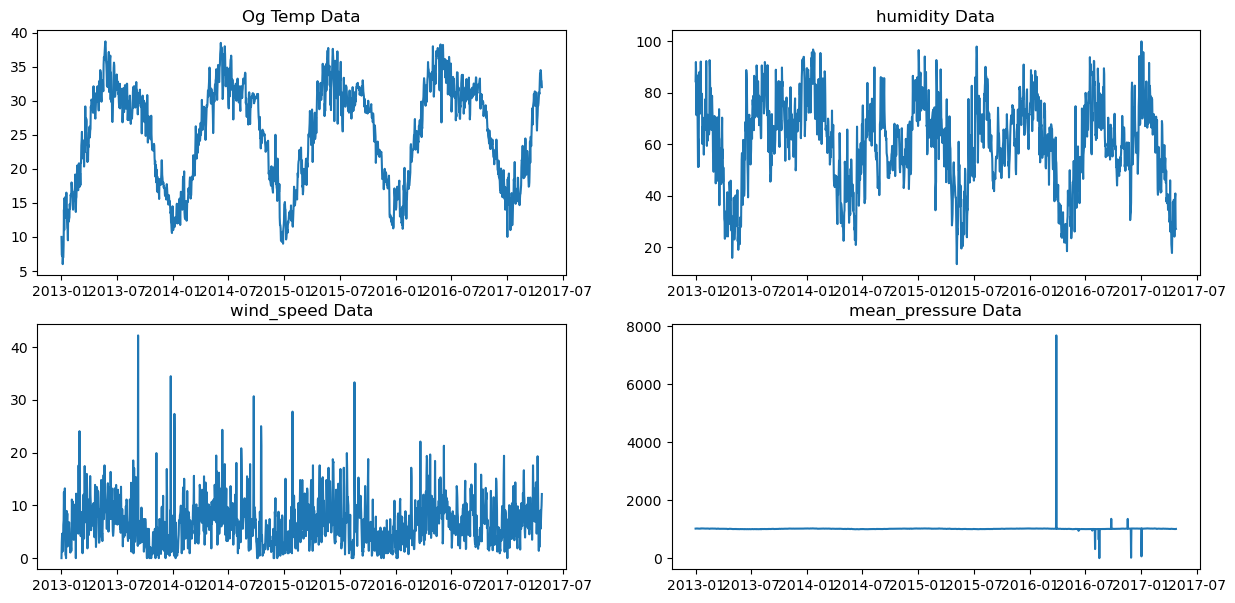

In [23]:
fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.ravel()
ax[0].plot(df['meantemp'])
ax[0].set_title('Og Temp Data')
ax[1].plot(df['humidity'])
ax[1].set_title('humidity Data')
ax[2].plot(df['wind_speed'])
ax[2].set_title('wind_speed Data')
ax[3].plot(df['meanpressure'])
ax[3].set_title('mean_pressure Data')

plt.show()

In [25]:
df = df.resample('7D').mean()
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,7.604762,83.295238,2.903810,1017.685714
2013-01-08,13.176871,66.511905,8.013265,1015.942177
2013-01-15,13.409524,80.068027,4.471905,1017.972789
2013-01-22,12.848639,64.748299,4.981973,1019.884694
2013-01-29,16.107653,70.279592,3.396378,1016.554592
...,...,...,...,...
2017-03-21,27.752381,42.359524,10.662262,1010.076190
2017-03-28,30.346372,35.467687,9.259666,1006.323980
2017-04-04,28.427638,29.095748,12.672740,1007.433617


In [30]:
df = df['meantemp']

In [31]:
df

date
2013-01-01     7.604762
2013-01-08    13.176871
2013-01-15    13.409524
2013-01-22    12.848639
2013-01-29    16.107653
                ...    
2017-03-21    27.752381
2017-03-28    30.346372
2017-04-04    28.427638
2017-04-11    30.492063
2017-04-18    33.432143
Freq: 7D, Name: meantemp, Length: 225, dtype: float64

**Splitting the Data:**

In [32]:
split_data = int(0.7*len(df))
train_data = df.iloc[:split_data]
test_data = df.iloc[split_data:]

In [37]:
len(train_data)

157

In [38]:
len(test_data)

68

In [35]:
#stationary check
result = adfuller(df)
p_val = result[1]

In [36]:
p_val

2.809835658479437e-06

**Here, P_val < 0.05, hence the data is stationary.**

### Correlogram:

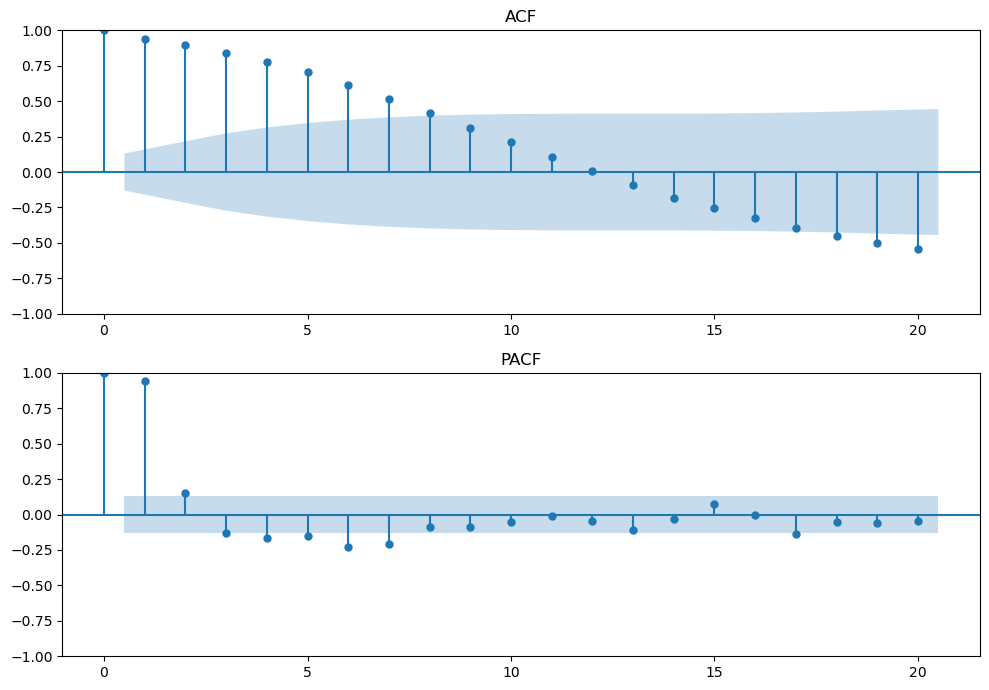

In [40]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))

#acf plot
plot_acf(df, lags = 20, ax=ax[0])
ax[0].set_title('ACF')

#pacf
plot_pacf(df, lags=20, ax = ax[1])
ax[1].set_title('PACF')

plt.tight_layout()

### ARIMA MODEL

In [50]:
model_ar = auto_arima(train_data, start_p=1, start_q=1, max_P=6, max_q=4, seasonal=False, trace=True)
model_ar.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=689.547, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1470.261, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1274.752, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=691.045, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=689.595, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1124.751, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=678.246, Time=0.12 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=675.558, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=690.944, Time=0.11 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=675.767, Time=0.29 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=675.163, Time=0.17 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=687.743, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:               SARIMAX(2, 0, 4)   Log Likelihood                -320.398
Date:                Tue, 27 Jun 2023   AIC                            656.796
Time:                        16:28:20   BIC                            681.245
Sample:                    01-01-2013   HQIC                           666.726
                         - 12-29-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3764      0.045      8.375      0.000       0.288       0.465
ar.L1          1.9764      0.006    344.082      0.000       1.965       1.988
ar.L2         -0.9915      0.006   -180.166      0.000      -1.002      -0.981
ma.L1         -1.2936      0.090    -14.425      0.000      -1.469      -1.118
ma.L2          0.2768      0.136      2.039      0.041       0.011       0.543
ma.L3         -0.0192      0.139     -0.138      0.890      -0.292       0.254
ma.L4          0.0624      0.090      0.690      0.490      -0.115       0.240
sigma2         3.1804      0.392      8.108      0.000       2.412       3.949
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 3.83
Prob(Q):                              0.55   Prob(JB):                         0.15
Heteroskedasticity (H):               0.92   Skew:                            -0.38
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The Best Model is ARIMA(2,0,4)** #p,q,r

In [78]:
model_ar1 = sm.tsa.ARIMA(train_data, order=(2,0,4)).fit()
pred_ar = model_ar1.predict(0,len(test_data)-1)

In [79]:
pred_ar

date
2013-01-01    24.881504
2013-01-08     8.164059
2013-01-15    13.699694
2013-01-22    14.903024
2013-01-29    14.697446
                ...    
2014-03-18    22.581662
2014-03-25    24.213619
2014-04-01    25.840988
2014-04-08    27.825331
2014-04-15    28.645322
Freq: 7D, Name: predicted_mean, Length: 68, dtype: float64

In [80]:
# jenkins test
lb_p_val = acorr_ljungbox(model_ar1.resid, lags = [20], return_df = True)
lb_p_val

,lb_stat,lb_pvalue
20,15.735102,0.732916


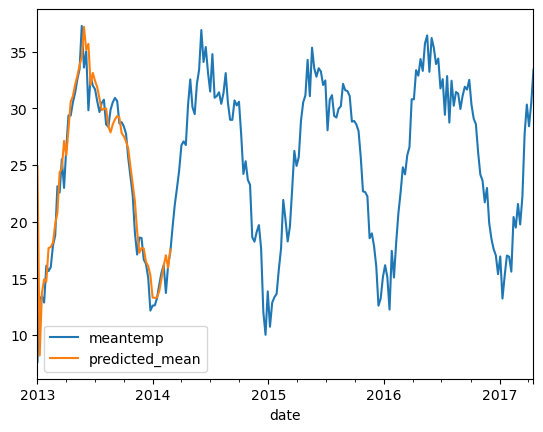

In [81]:
df.plot()
model_ar1.predict(start = 0, end = 60).plot()
plt.legend()

In [59]:
len(df)

225

### SARIMA MODEL

In [100]:
model_sa = auto_arima(train_data, start_p=1, start_q=1, max_P=10, max_q=20,start_d = 1, max_d=7, seasonal=True, trace=True, m=52)
model_sa.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=682.562, Time=2.07 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1072.402, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=680.021, Time=0.95 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=1470.261, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=686.767, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=681.890, Time=4.28 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=681.858, Time=2.14 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=680.670, Time=0.90 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=16.48 sec
 ARIMA(0,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=680.876, Time=1.34 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=680.948, Time=1.11 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=771.690, Time=2.31 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  157
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 52)   Log Likelihood                -336.010
Date:                            Tue, 27 Jun 2023   AIC                            680.021
Time:                                    17:40:07   BIC                            692.246
Sample:                                01-01-2013   HQIC                           684.986
                                     - 12-29-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7803      0.296      2.638      0.008       0.201       1.360
ar.L1          0.9512      0.020     47.387      0.000       0.912       0.991
ar.S.L52       0.2921      0.090      3.246      0.001       0.116       0.468
sigma2         4.0460      0.486      8.320      0.000       3.093       4.999
===================================================================================
Ljung-Box (L1) (Q):                   2.73   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.10   Prob(JB):                         0.75
Heteroskedasticity (H):               1.02   Skew:                            -0.13
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
# Best model:  ARIMA(1,0,0)(1,0,0)[52] intercept

In [114]:
model_s = SARIMAX(df, order = (0,1,0), seasonal_order=(1,0,0,12))#seasonorder = p,d,q,m
model_sa =model_s.fit()

In [115]:
pred_sa = model_sa.predict(start = df.index[0], end = df.index[-1])

In [116]:
pred_sa

date
2013-01-01     0.000000
2013-01-08     7.604762
2013-01-15    13.176871
2013-01-22    13.409524
2013-01-29    12.848639
                ...    
2017-03-21    22.287734
2017-03-28    27.678723
2017-04-04    30.521296
2017-04-11    28.332500
2017-04-18    30.408794
Freq: 7D, Name: predicted_mean, Length: 225, dtype: float64

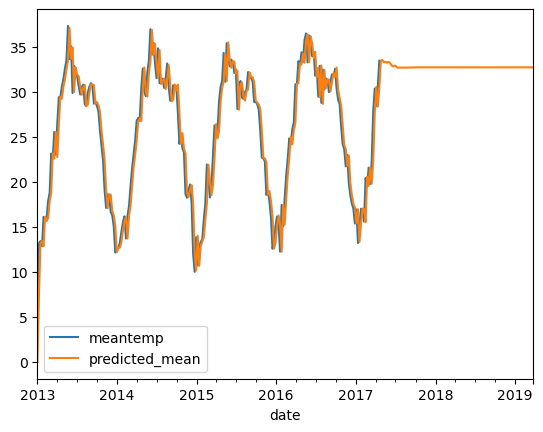

In [118]:
df.plot()
model_sa.predict(start =0, end = len(df)+100).plot()
plt.legend()

[]

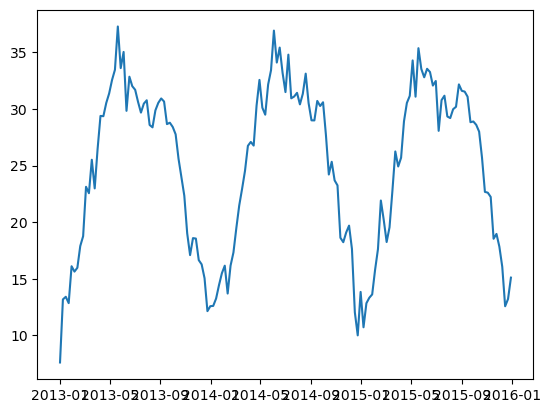

In [119]:
plt.plot(train_data.index, train_data)
plt.plot()